In [15]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


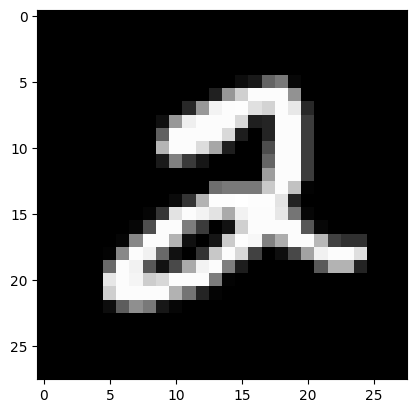


digit =  2


In [17]:
#Display the 5th image in the training set
import matplotlib.pyplot as plt
plt.imshow(X_train[5], cmap='gray')
plt.show()

# Display the labelled digit for the picture
lbl = y_train[5]
print("\ndigit = ", lbl)

In [18]:
#Normalize the data between 0 and 1
X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test = X_test.reshape(10000, 28, 28, 1)/255

In [19]:
#Normalize the data between 0 and 1
X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test = X_test.reshape(10000, 28, 28, 1)/255

In [20]:
import keras
from keras.models import Sequential
model = Sequential()

In [ ]:
#Input Layer :Conv2D Layer
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

#First Convolutional layer
#28 filters, each of size 3x3, Grayscale image input: 28x28 pixels, 1 channel
model.add(Conv2D(filters=28,kernel_size=(3, 3),input_shape=(28, 28, 1), activation='relu'))


#First Hidden layer : MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second hidden layer: Flatten
model.add(Flatten())

# Third hidden layer: Dense(128) + ReLU
model.add(Dense(128, activation='relu'))

#Output Layer: Dense(10) + Softmax
model.add(Dense(10, activation='softmax'))

# Summary
model.summary()


C:\Users\tunde\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


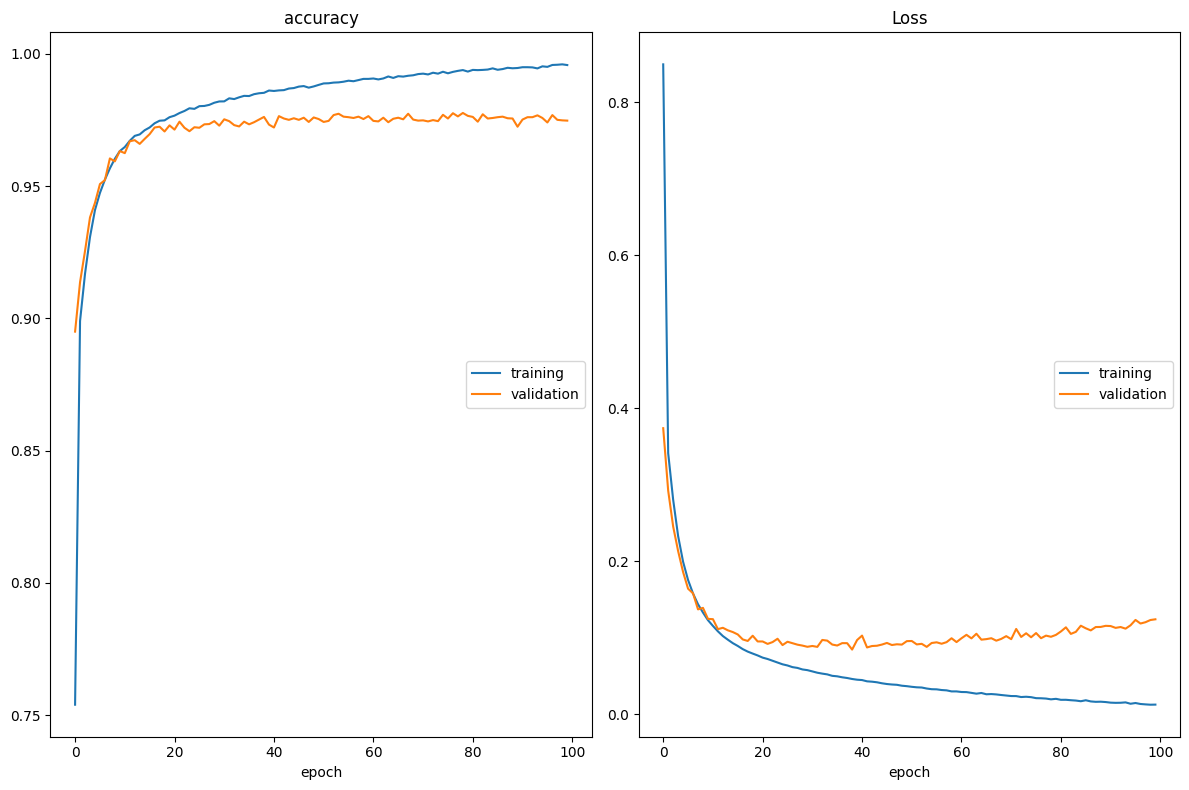

accuracy
	training         	 (min:    0.754, max:    0.996, cur:    0.996)
	validation       	 (min:    0.895, max:    0.978, cur:    0.975)
Loss
	training         	 (min:    0.012, max:    0.850, cur:    0.013)
	validation       	 (min:    0.085, max:    0.374, cur:    0.124)


In [23]:
#use livelossplot to show the curve
from livelossplot import PlotLossesKeras

model.fit(X_train, y_train,
          epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\nTest loss:", loss)
print("Test accuracy:", accuracy)


Test loss: 0.12413602322340012
Test accuracy: 0.9747999906539917
